In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical, plot_model

from tensorflow.keras.layers import LSTM, BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, Bidirectional

#### Funcion Matriz de Confusion

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_labels,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    
    # Usar unique_labels para obtener las etiquetas que se han usado de hecho
    labels = unique_labels(y_true, y_pred)
    class_labels = [class_labels[label] for label in labels]  # Actualizar las etiquetas para el gráfico
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)

    # Poner las etiquetas en los cuadrados
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')

# PREPARACION MODELOS

#### CARGA DE DATOS

In [ ]:
data_procesado = pd.read_csv('procesado.csv')
data_eeglab = pd.read_csv('procesado_eeglab.csv')

#### DIVISION EN TRAIN Y TEST

In [ ]:
#DATASET SIN EEGLAB
X_procesado = data_procesado.iloc[:, :-1]
y_procesado = data_procesado.iloc[:, -1]

X_train_procesado, X_test_procesado, y_train_procesado, y_test_procesado = train_test_split(
    X_procesado, y_procesado, test_size=0.2, random_state=42, stratify=y_procesado)


#DATASET CON EEGLAB
X_eeglab = data_eeglab.iloc[:, :-1]
y_eeglab = data_eeglab.iloc[:, -1]

X_train_eeglab, X_test_eeglab, y_train_eeglab, y_test_eeglab = train_test_split(
    X_eeglab, y_eeglab, test_size=0.2, random_state=42, stratify=y_eeglab)

#### ESCALADO

In [ ]:
scaler = StandardScaler()

# Ajustar y transformar los datos
X_train_procesado_scaled = scaler.fit_transform(X_train_procesado)
X_test_procesado_scaled = scaler.transform(X_test_procesado)

X_train_eeglab_scaled = scaler.fit_transform(X_train_eeglab)
X_test_eeglab_scaled = scaler.transform(X_test_eeglab)

#### MAPEAR RESULTADOS

In [2]:
emotion_labels = {
    0: 'Disgust',
    1: 'Fear',
    2: 'Sad',
    3: 'Neutral',
    4: 'Happy'
}

# CLASIFICADORES

## GRADIENT BOOSTING

##### DATASET SIN EEGLAB

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=5, random_state=42)
gbm.fit(X_train_procesado_scaled, y_train_procesado)
y_pred_procesado_gbm = gbm.predict(X_test_procesado_scaled)

# Evaluación del modelo
accuracy_gbm_procesado = accuracy_score(y_test_procesado, y_pred_procesado_gbm)
print("Evaluación para el dataset 'procesado' con Gradient Boosting:")
print("Reporte de Clasificación:\n", classification_report(y_test_procesado, y_pred_procesado_gbm, target_names=list(emotion_labels.values())))
print("Accuracy:", accuracy_gbm_procesado)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
plot_confusion_matrix(y_test_procesado, y_pred_procesado_gbm, class_labels=list(emotion_labels.values()))
plt.show()

Evaluación para el dataset 'procesado' con Gradient Boosting:
Reporte de Clasificación:
               precision    recall  f1-score   support

     Disgust       0.55      0.23      0.32       979
        Fear       0.58      0.50      0.53      1194
         Sad       0.44      0.72      0.55      1523
     Neutral       0.54      0.48      0.51      1175
       Happy       0.57      0.51      0.54       963

    accuracy                           0.51      5834
   macro avg       0.53      0.49      0.49      5834
weighted avg       0.53      0.51      0.50      5834

Accuracy: 0.5082276311278711

In [3]:
accuracy_gbm_procesado = 0.5082276311278711

##### DATASET CON EEGLAB

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=5, max_features='sqrt', subsample=1.0, random_state=42)
gbm.fit(X_train_eeglab_scaled, y_train_eeglab)

# Predicciones en el conjunto de prueba
y_pred_eeglab_gbm = gbm.predict(X_test_eeglab_scaled)

# Evaluación del modelo
accuracy_gbm_eeglab = accuracy_score(y_test_eeglab, y_pred_eeglab_gbm)
print("Evaluación para el dataset 'procesado_eeglab' con Gradient Boosting:")
print("Reporte de Clasificación:\n", classification_report(y_test_eeglab, y_pred_eeglab_gbm, target_names=list(emotion_labels.values())))
print("Accuracy:", accuracy_gbm_eeglab)

# Visualizar la matriz de confusión para 'procesado_eeglab'
plt.figure(figsize=(10, 7))
plot_confusion_matrix(y_test_eeglab, y_pred_eeglab_gbm, class_labels=list(emotion_labels.values()))
plt.show()

Evaluacion para el dataset 'procesado_eeglab' con Gradient Boosting:
Reporte de Clasificacion:
               precision    recall  f1-score   support

     Disgust       0.85      0.80      0.83       979
        Fear       0.89      0.86      0.87      1194
         Sad       0.84      0.89      0.87      1523
     Neutral       0.83      0.85      0.84      1175
       Happy       0.84      0.83      0.84       963

    accuracy                           0.85      5834
   macro avg       0.85      0.85      0.85      5834
weighted avg       0.85      0.85      0.85      5834

Accuracy: 0.8501885498800137

In [12]:
accuracy_gbm_eeglab =  0.8501885498800137

## MLP

###### DATASET SIN EEGLAB

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42, verbose=True)
mlp.fit(X_train_procesado_scaled, y_train_procesado)

# Predicciones en el conjunto de prueba
y_pred_procesado_mlp = mlp.predict(X_test_procesado_scaled)

# Evaluación del modelo
accuracy_mlp_procesado = accuracy_score(y_test_procesado, y_pred_procesado_mlp)
print("Evaluación para el dataset 'procesado' con MLPClassifier:")
print("Reporte de Clasificación:\n", classification_report(y_test_procesado, y_pred_procesado_mlp, target_names=list(emotion_labels.values())))
print("Accuracy:", accuracy_mlp_procesado)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
plot_confusion_matrix(y_test_procesado, y_pred_procesado_mlp, class_labels=list(emotion_labels.values()))
plt.show()

Evaluacin para el dataset 'procesado' con MLPClassifier:
Reporte de Clasificacin:
               precision    recall  f1-score   support

     Disgust       0.58      0.54      0.56       979
        Fear       0.66      0.69      0.67      1194
         Sad       0.62      0.65      0.64      1523
     Neutral       0.61      0.61      0.61      1175
       Happy       0.66      0.62      0.64       963

    accuracy                           0.63      5834
   macro avg       0.63      0.62      0.62      5834
weighted avg       0.63      0.63      0.63      5834

Accuracy: 0.6275282824820021

In [4]:
accuracy_mlp_procesado =  0.6275282824820021

###### DATASET CON EEGLAB

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42, verbose=True)
mlp.fit(X_train_eeglab_scaled, y_train_eeglab)

# Predicciones en el conjunto de prueba
y_pred_eeglab_mlp = mlp.predict(X_test_eeglab_scaled)

# Evaluación del modelo
accuracy_mlp_eeglab = accuracy_score(y_test_eeglab, y_pred_eeglab_mlp)
print("Evaluación para el dataset 'procesado_eeglab' con MLPClassifier:")
print("Reporte de Clasificación:\n", classification_report(y_test_eeglab, y_pred_eeglab_mlp, target_names=list(emotion_labels.values())))
print("Accuracy:", accuracy_mlp_eeglab)

# Visualizar la matriz de confusión para 'procesado_eeglab'
plt.figure(figsize=(10, 7))
plot_confusion_matrix(y_test_eeglab, y_pred_eeglab_mlp, class_labels=list(emotion_labels.values()))
plt.show()

Reporte de Clasificacin:
               precision    recall  f1-score   support

     Disgust       0.83      0.86      0.85       979
        Fear       0.89      0.88      0.89      1194
         Sad       0.89      0.89      0.89      1523
     Neutral       0.87      0.88      0.87      1175
       Happy       0.87      0.85      0.86       963

    accuracy                           0.87      5834
   macro avg       0.87      0.87      0.87      5834
weighted avg       0.87      0.87      0.87      5834

Accuracy: 0.8736715803908125


In [5]:
accuracy_mlp_eeglab = 0.8236715803908125

## CNN

##### DATASET SIN EEGLAB

In [ ]:
# Preprocesamiento de los datos
X_train_cnn = X_train_procesado_scaled.reshape(X_train_procesado_scaled.shape[0], 10, 31, 1)  # Adaptar según el tamaño
X_test_cnn = X_test_procesado_scaled.reshape(X_test_procesado_scaled.shape[0], 10, 31, 1)  # Adaptar según el tamaño

# Codificar las etiquetas
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_procesado)
y_test_encoded = encoder.transform(y_test_procesado)

# Convertir las etiquetas a categóricas
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Crear el modelo
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(10, 31, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # Cambia 5 por el número de clases

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_cnn, y_train_categorical, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_cnn, y_test_categorical))

# Evaluación del modelo
y_pred_categorical = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_categorical, axis=1)

accuracy_cnn_procesado = accuracy_score(y_test_encoded, y_pred)
print("Evaluación para el dataset 'procesado' con CNN:")
print("Reporte de Clasificación:\n", classification_report(y_test_encoded, y_pred, target_names=list(emotion_labels.values())))
print("Accuracy:", accuracy_cnn_procesado)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
plot_confusion_matrix(y_test_encoded, y_pred, class_labels=list(emotion_labels.values()))
plt.show()

Evaluacin para el dataset 'procesado' con CNN:
Reporte de Clasificacin:
               precision    recall  f1-score   support

     Disgust       0.43      0.36      0.39       979
        Fear       0.50      0.53      0.51      1194
         Sad       0.46      0.58      0.51      1523
     Neutral       0.56      0.41      0.47      1175
       Happy       0.53      0.54      0.54       963

    accuracy                           0.49      5834
   macro avg       0.50      0.48      0.49      5834
weighted avg       0.49      0.49      0.49      5834

Accuracy: 0.490743914981145

In [6]:
accuracy_cnn_procesado = 0.490743914981145

##### DATASET CON EEGLAB

In [ ]:
# Preprocesamiento de los datos para el modelo CNN
X_train_cnn = X_train_eeglab_scaled.reshape(X_train_eeglab_scaled.shape[0], 10, 31, 1)
X_test_cnn = X_test_eeglab_scaled.reshape(X_test_eeglab_scaled.shape[0], 10, 31, 1)

# Codificar las etiquetas
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_eeglab)
y_test_encoded = encoder.transform(y_test_eeglab)

# Convertir las etiquetas a categoricas
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Crear el modelo CNN mejorado
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(10, 31, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

# Compilar el modelo con un optimizador Adam y una tasa de aprendizaje ajustada
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Callbacks para Early Stopping y Reduccion de la Tasa de Aprendizaje
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Entrenar el modelo con las nuevas configuraciones
history = model.fit(X_train_cnn, y_train_categorical, epochs=80, batch_size=64, 
                    validation_data=(X_test_cnn, y_test_categorical), 
                    callbacks=[early_stopping, reduce_lr], verbose=1)

# Evaluacion del modelo mejorado
y_pred_categorical = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_categorical, axis=1)

accuracy_cnn_eeglab = accuracy_score(y_test_encoded, y_pred)
print("Evaluacion para el dataset 'procesado_eeglab' con CNN mejorado:")
print("Reporte de Clasificacion:\n", classification_report(y_test_encoded, y_pred, target_names=list(emotion_labels.values())))
print("Accuracy:", accuracy_cnn_eeglab)

# Visualizar la matriz de confusion
plt.figure(figsize=(10, 7))
plot_confusion_matrix(y_test_encoded, y_pred, class_labels=list(emotion_labels.values()))
plt.show()

# Graficas de perdida y precision
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# Guardar la grafica del modelo en un archivo PNG
plot_model(model, to_file='CNN_ARCHITECTURE.png', show_shapes=True, show_layer_names=True)

# Mostrar la imagen del modelo
from IPython.display import Image
Image(filename='CNN_ARCHITECTURE.png')

Evaluacion para el dataset 'procesado_eeglab' con CNN mejorado:
Reporte de Clasificacion:
               precision    recall  f1-score   support

     Disgust       0.90      0.87      0.88       979
        Fear       0.93      0.89      0.91      1194
         Sad       0.88      0.90      0.89      1523
     Neutral       0.90      0.89      0.89      1175
       Happy       0.87      0.90      0.88       963

    accuracy                           0.89      5834
   

Accuracy: 0.8921837504285225

In [7]:
accuracy_cnn_eeglab = 0.8921837504285225

## LSTM

##### DATASET SIN EEGLAB

In [ ]:
X_train_lstm = X_train_procesado_scaled.reshape(X_train_procesado_scaled.shape[0], 10, 31)  # 10 ventanas temporales, 31 características
X_test_lstm = X_test_procesado_scaled.reshape(X_test_procesado_scaled.shape[0], 10, 31)  # 10 ventanas temporales, 31 características

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_procesado)
y_test_encoded = encoder.transform(y_test_procesado)

y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Crear el modelo
model_procesado = Sequential()
model_procesado.add(LSTM(128, input_shape=(10, 31), return_sequences=True))
model_procesado.add(Dropout(0.5))
model_procesado.add(LSTM(128))
model_procesado.add(Dropout(0.5))
model_procesado.add(Dense(5, activation='softmax')) 

model_procesado.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Entrenar el modelo
model_procesado.fit(X_train_lstm, y_train_categorical, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_lstm, y_test_categorical))

# Evaluación del modelo
y_pred_categorical_procesado = model_procesado.predict(X_test_lstm)
y_pred_procesado = np.argmax(y_pred_categorical_procesado, axis=1)

accuracy_lstm_procesado = accuracy_score(y_test_encoded, y_pred_procesado)
print("Evaluación para el dataset 'procesado' con LSTM:")
print("Reporte de Clasificación:\n", classification_report(y_test_encoded, y_pred_procesado, target_names=list(emotion_labels.values())))
print("Accuracy:", accuracy_lstm_procesado)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
plot_confusion_matrix(y_test_encoded, y_pred_procesado, class_labels=list(emotion_labels.values()))
plt.show()

Reporte de Clasificación:
               precision    recall  f1-score   support

     Disgust       0.58      0.49      0.53       979
        Fear       0.61      0.64      0.63      1194
         Sad       0.58      0.64      0.61      1523
     Neutral       0.61      0.57      0.59      1175
       Happy       0.61      0.61      0.61       963

    accuracy                           0.60      5834

In [8]:
accuracy_lstm_procesado = 0.5965032567706547

##### DATASET CON EEGLAB

In [ ]:
# Preprocesamiento de los datos
X_train_lstm = X_train_eeglab_scaled.reshape(X_train_eeglab_scaled.shape[0], 10, 31)  # 10 ventanas temporales, 31 características
X_test_lstm = X_test_eeglab_scaled.reshape(X_test_eeglab_scaled.shape[0], 10, 31)  # 10 ventanas temporales, 31 características

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_eeglab)
y_test_encoded = encoder.transform(y_test_eeglab)

y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Crear el modelo
model_procesado = Sequential()
model_procesado.add(LSTM(128, input_shape=(10, 31), return_sequences=True))
model_procesado.add(Dropout(0.5))
model_procesado.add(LSTM(128))
model_procesado.add(Dropout(0.5))
model_procesado.add(Dense(5, activation='softmax')) 

model_procesado.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Entrenar el modelo
history = model_procesado.fit(X_train_lstm, y_train_categorical, epochs=80, batch_size=32, verbose=1, validation_data=(X_test_lstm, y_test_categorical))

# Evaluación del modelo
y_pred_categorical_procesado = model_procesado.predict(X_test_lstm)
y_pred_procesado = np.argmax(y_pred_categorical_procesado, axis=1)

accuracy_lstm_eeglab = accuracy_score(y_test_encoded, y_pred_procesado)
print("Evaluación para el dataset 'procesado_eeglab' con LSTM:")
print("Reporte de Clasificación:\n", classification_report(y_test_encoded, y_pred_procesado, target_names=list(emotion_labels.values())))
print("Accuracy:", accuracy_lstm_eeglab)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
plot_confusion_matrix(y_test_encoded, y_pred_procesado, class_labels=list(emotion_labels.values()))
plt.show()

# Graficar Accuracy y Loss
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

Reporte de Clasificación:
               precision    recall  f1-score   support

     Disgust       0.86      0.86      0.86       979
        Fear       0.88      0.90      0.89      1194
         Sad       0.88      0.90      0.89      1523
     Neutral       0.89      0.85      0.87      1175
       Happy       0.88      0.87      0.87       963

    accuracy                           0.88      5834
   
Accuracy: 0.8796708947548851

In [9]:
accuracy_lstm_eeglab = 0.8796708947548851

# GRAFICAR RESULTADOS

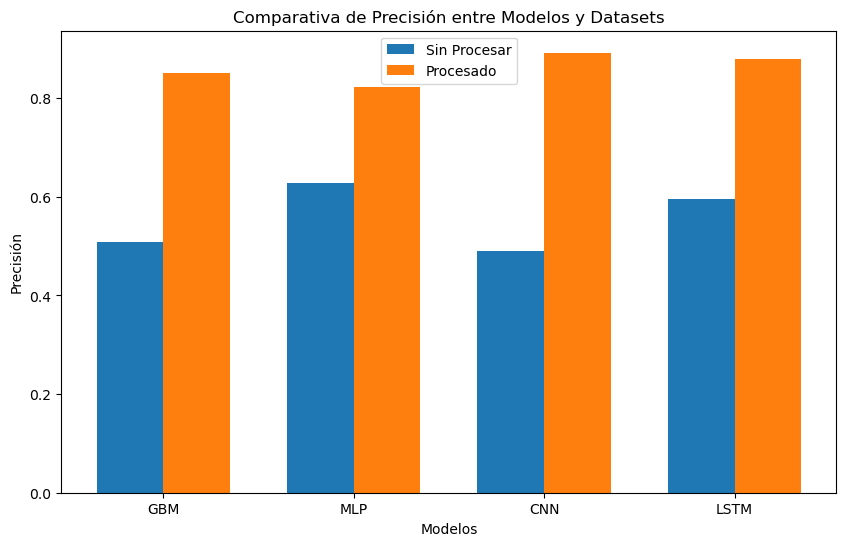

In [13]:
# Datos de precisión
results = {
    'GBM': [accuracy_gbm_procesado, accuracy_gbm_eeglab],
    'MLP': [accuracy_mlp_procesado, accuracy_mlp_eeglab],
    'CNN': [accuracy_cnn_procesado, accuracy_cnn_eeglab],
    'LSTM': [accuracy_lstm_procesado, accuracy_lstm_eeglab]
}

datasets = ['Sin Procesar', 'Procesado']
model_names = list(results.keys())
num_models = len(model_names)
bar_width = 0.35  # Ancho de las barras
index = np.arange(num_models)

# Gráficos para los datasets
bars1 = [results[model][0] for model in model_names]
bars2 = [results[model][1] for model in model_names]

# Crear las barras
plt.figure(figsize=(10, 6))
plt.bar(index, bars1, bar_width, label=datasets[0])
plt.bar(index + bar_width, bars2, bar_width, label=datasets[1])

# Etiquetas y títulos
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Comparativa de Precisión entre Modelos y Datasets')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()

# Mostrar gráfico
plt.show()

# PRUEBAS MEJORA

### LSTM ANTI OVERFITTING

In [ ]:
# Preprocesamiento de los datos para el dataset 'procesado_eeglab'
X_train_lstm_eeglab = X_train_eeglab_scaled.reshape(X_train_eeglab_scaled.shape[0], 10, 31)  # 10 ventanas temporales, 31 características
X_test_lstm_eeglab = X_test_eeglab_scaled.reshape(X_test_eeglab_scaled.shape[0], 10, 31)  # 10 ventanas temporales, 31 características

# Codificar las etiquetas
encoder = LabelEncoder()
y_train_encoded_eeglab = encoder.fit_transform(y_train_eeglab)
y_test_encoded_eeglab = encoder.transform(y_test_eeglab)

# Convertir las etiquetas a categóricas
y_train_categorical_eeglab = to_categorical(y_train_encoded_eeglab)
y_test_categorical_eeglab = to_categorical(y_test_encoded_eeglab)

# Definir el modelo LSTM con las modificaciones
model_eeglab = Sequential()
model_eeglab.add(LSTM(64, input_shape=(10, 31), return_sequences=True, kernel_regularizer=l2(0.01)))
model_eeglab.add(BatchNormalization())  # Añadir Batch Normalization
model_eeglab.add(Dropout(0.6))  # Aumentar la tasa de dropout

model_eeglab.add(LSTM(64, kernel_regularizer=l2(0.01)))
model_eeglab.add(BatchNormalization())  # Añadir Batch Normalization
model_eeglab.add(Dropout(0.6))  # Aumentar la tasa de dropout

model_eeglab.add(Dense(5, activation='softmax'))  # Cambia 5 por el número de clases

# Compilar el modelo con una tasa de aprendizaje reducida
model_eeglab.compile(loss='categorical_crossentropy', 
                     optimizer=Adam(learning_rate=0.0001),  # Reducir la tasa de aprendizaje
                     metrics=['accuracy'])

# Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model_eeglab.fit(X_train_lstm_eeglab, y_train_categorical_eeglab, 
                           epochs=200, batch_size=32, verbose=1, 
                           validation_data=(X_test_lstm_eeglab, y_test_categorical_eeglab), 
                           callbacks=[early_stopping])

# Evaluación del modelo
y_pred_categorical_eeglab = model_eeglab.predict(X_test_lstm_eeglab)
y_pred_eeglab = np.argmax(y_pred_categorical_eeglab, axis=1)

print("Evaluación para el dataset 'procesado_eeglab' con LSTM:")
print("Reporte de Clasificación:\n", classification_report(y_test_encoded_eeglab, y_pred_eeglab, target_names=list(emotion_labels.values())))
print("Accuracy:", accuracy_score(y_test_encoded_eeglab, y_pred_eeglab))

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
plot_confusion_matrix(y_test_encoded_eeglab, y_pred_eeglab, class_labels=list(emotion_labels.values()))
plt.show()

# Gráficas de pérdida y precisión
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

Reporte de Clasificación:
               precision    recall  f1-score   support

     Disgust       0.70      0.62      0.66       979
        Fear       0.73      0.72      0.73      1194
         Sad       0.68      0.79      0.73      1523
     Neutral       0.74      0.65      0.69      1175
       Happy       0.68      0.70      0.69       963

    accuracy                           0.71      5834
    
    Accuracy: 0.7055193692149468

### LSTM + CNN

In [ ]:
# Preprocesamiento de los datos
X_train_combined = X_train_eeglab_scaled.reshape(X_train_eeglab_scaled.shape[0], 10, 31)  # 10 ventanas temporales, 31 características
X_test_combined = X_test_eeglab_scaled.reshape(X_test_eeglab_scaled.shape[0], 10, 31)  # 10 ventanas temporales, 31 características

# Codificar las etiquetas
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_eeglab)
y_test_encoded = encoder.transform(y_test_eeglab)

# Convertir las etiquetas a categóricas
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Crear el modelo CNN + LSTM
model_combined = Sequential()

# Capas CNN para extraer características locales de las secuencias
model_combined.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(10, 31)))
model_combined.add(BatchNormalization())
model_combined.add(MaxPooling1D(pool_size=2))
model_combined.add(Dropout(0.3))

model_combined.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model_combined.add(BatchNormalization())
model_combined.add(MaxPooling1D(pool_size=2))
model_combined.add(Dropout(0.3))

# LSTM para capturar dependencias temporales
model_combined.add(LSTM(128, return_sequences=True))
model_combined.add(Dropout(0.4))
model_combined.add(LSTM(64))

# Capa densa para la clasificación final
model_combined.add(Dense(5, activation='softmax'))  # Cambia '5' por el número de clases

# Compilar el modelo
optimizer = Adam(learning_rate=0.0005)
model_combined.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
history = model_combined.fit(X_train_combined, y_train_categorical, epochs=80, batch_size=32, verbose=1, validation_data=(X_test_combined, y_test_categorical))

# Evaluación del modelo
y_pred_categorical = model_combined.predict(X_test_combined)
y_pred = np.argmax(y_pred_categorical, axis=1)

accuracy_combined = accuracy_score(y_test_encoded, y_pred)
print("Evaluación para el dataset 'procesado_eeglab' con CNN + LSTM:")
print("Reporte de Clasificación:\n", classification_report(y_test_encoded, y_pred, target_names=list(emotion_labels.values())))
print("Accuracy:", accuracy_combined)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
plot_confusion_matrix(y_test_encoded, y_pred, class_labels=list(emotion_labels.values()))
plt.show()

# Graficar Accuracy y Loss
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

Reporte de Clasificación:
               precision    recall  f1-score   support

     Disgust       0.89      0.89      0.89       979
        Fear       0.91      0.93      0.92      1194
         Sad       0.94      0.91      0.92      1523
     Neutral       0.92      0.91      0.91      1175
       Happy       0.88      0.91      0.90       963

    accuracy                           0.91      5834
    macro avg       0.91      0.91     0.91      5834
    weighted avg    0.91      0.91     0.91      5834

    Accuracy: 0.9110387384298937

### LSTM BIDIRECCIONAL

In [ ]:
# Preprocesamiento de los datos para el dataset 'procesado_eeglab'
X_train_lstm_eeglab = X_train_eeglab_scaled.reshape(X_train_eeglab_scaled.shape[0], 10, 31)  # 10 ventanas temporales, 31 características
X_test_lstm_eeglab = X_test_eeglab_scaled.reshape(X_test_eeglab_scaled.shape[0], 10, 31)  # 10 ventanas temporales, 31 características

# Codificar las etiquetas
encoder = LabelEncoder()
y_train_encoded_eeglab = encoder.fit_transform(y_train_eeglab)
y_test_encoded_eeglab = encoder.transform(y_test_eeglab)

# Convertir las etiquetas a categóricas
y_train_categorical_eeglab = to_categorical(y_train_encoded_eeglab)
y_test_categorical_eeglab = to_categorical(y_test_encoded_eeglab)

# Definir el modelo LSTM con más complejidad
model_eeglab = Sequential()
model_eeglab.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001)), input_shape=(10, 31)))
model_eeglab.add(BatchNormalization())
model_eeglab.add(Dropout(0.5))

model_eeglab.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001))))
model_eeglab.add(BatchNormalization())
model_eeglab.add(Dropout(0.5))

model_eeglab.add(LSTM(64, kernel_regularizer=l2(0.001)))
model_eeglab.add(BatchNormalization())
model_eeglab.add(Dropout(0.4))

model_eeglab.add(Dense(5, activation='softmax'))  # Cambia 5 por el número de clases

# Compilar el modelo con una tasa de aprendizaje reducida
model_eeglab.compile(loss='categorical_crossentropy', 
                     optimizer=Adam(learning_rate=0.0005),  # Ajustar la tasa de aprendizaje
                     metrics=['accuracy'])

# Implementar Early Stopping y ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Entrenar el modelo
history = model_eeglab.fit(X_train_lstm_eeglab, y_train_categorical_eeglab, 
                           epochs=100, batch_size=32, verbose=1, 
                           validation_data=(X_test_lstm_eeglab, y_test_categorical_eeglab), 
                           callbacks=[early_stopping, reduce_lr])

# Evaluación del modelo
y_pred_categorical_eeglab = model_eeglab.predict(X_test_lstm_eeglab)
y_pred_eeglab = np.argmax(y_pred_categorical_eeglab, axis=1)

print("Evaluación para el dataset 'procesado_eeglab' con LSTM:")
print("Reporte de Clasificación:\n", classification_report(y_test_encoded_eeglab, y_pred_eeglab, target_names=list(emotion_labels.values())))
print("Accuracy:", accuracy_score(y_test_encoded_eeglab, y_pred_eeglab))

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
plot_confusion_matrix(y_test_encoded_eeglab, y_pred_eeglab, class_labels=list(emotion_labels.values()))
plt.show()

# Gráficas de pérdida y precisión
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

Reporte de Clasificación:
               precision    recall  f1-score   support

     Disgust       0.95      0.94      0.94       979
        Fear       0.96      0.96      0.96      1194
         Sad       0.96      0.95      0.96      1523
     Neutral       0.96      0.96      0.96      1175
       Happy       0.92      0.95      0.94       963

    accuracy                           0.95      5834
    macro avg       0.95      0.95     0.95      5834
    weighted avg    0.95      0.95     0.95      5834

Accuracy: 0.9508056222146041